In [17]:
pip install ultralytics


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/License_plate_detection

/content/License_plate_detection


In [8]:
!zip -r models.zip /content/License_plate_detection



  adding: content/License_plate_detection/ (stored 0%)
  adding: content/License_plate_detection/demo2.jpeg (deflated 0%)
  adding: content/License_plate_detection/runs/ (stored 0%)
  adding: content/License_plate_detection/runs/detect/ (stored 0%)
  adding: content/License_plate_detection/runs/detect/train/ (stored 0%)
  adding: content/License_plate_detection/runs/detect/train/labels.jpg (deflated 39%)
  adding: content/License_plate_detection/runs/detect/train/labels_correlogram.jpg (deflated 43%)
  adding: content/License_plate_detection/runs/detect/train/weights/ (stored 0%)
  adding: content/License_plate_detection/runs/detect/train/args.yaml (deflated 53%)
  adding: content/License_plate_detection/runs/detect/train/events.out.tfevents.1731775124.2f9d5c3a8d7d.7421.0 (deflated 94%)
  adding: content/License_plate_detection/runs/detect/train2/ (stored 0%)
  adding: content/License_plate_detection/runs/detect/train2/labels.jpg (deflated 39%)
  adding: content/License_plate_detection

In [10]:
from google.colab import files
files.download('models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from google.colab import files

# Upload your zip file
uploaded = files.upload()


In [6]:
import zipfile

# Replace 'your_folder.zip' with the name of the uploaded ZIP file
with zipfile.ZipFile('/content/models.zip', 'r') as zip_ref:
    zip_ref.extractall('/')  # Extract to the current directory


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BTzNneFYj5gMS7JwHqM4")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [9]:
pip install -r /content/License_plate_detection/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
Reason for being yanked: Bug - do not use
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [1]:
import streamlit as st
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
from PIL import Image




In [6]:
!pip uninstall ultralytics
!pip install ultralytics


Found existing installation: ultralytics 8.0.15
Uninstalling ultralytics-8.0.15:
  Would remove:
    /usr/local/bin/ultralytics
    /usr/local/bin/yolo
    /usr/local/lib/python3.10/dist-packages/ultralytics-8.0.15.dist-info/*
    /usr/local/lib/python3.10/dist-packages/ultralytics/*
Proceed (Y/n)? y
  Successfully uninstalled ultralytics-8.0.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 14.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.1MB/s]

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:360: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt

In [3]:
model.train(
    data='/content/License_plate_detection/License-Plate-Detector-2/data.yaml',
    epochs=50,
    imgsz=640  # Image size for training, typically 640x640 for YOLOv8
)


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License_plate_detection/License-Plate-Detector-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/License_plate_detection/License-Plate-Detector-2/train/labels.cache... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<?, ?it/s]
val: Scanning /content/License_plate_detection/License-Plate-Detector-2/valid/labels.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.114      2.888      1.216          6        640: 100%|██████████| 18/18 [00:30<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

                   all         81         81    0.00333          1      0.942      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.9783       1.73      1.022         10        640: 100%|██████████| 18/18 [00:28<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         81         81    0.00321      0.963      0.734      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.009      1.546       1.06          9        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         81         81      0.958      0.567      0.807      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.059      1.559       1.07         11        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.14s/it]

                   all         81         81      0.717      0.688      0.789      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.071      1.493      1.103          9        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         81         81      0.536      0.614      0.523      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.084      1.445      1.121          7        640: 100%|██████████| 18/18 [00:28<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         81         81      0.298      0.778      0.321      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.067      1.349      1.101          9        640: 100%|██████████| 18/18 [00:28<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all         81         81       0.57      0.667      0.673      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.014      1.254      1.093          6        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all         81         81      0.764      0.815      0.804      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.034      1.145      1.103          7        640: 100%|██████████| 18/18 [00:28<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.06s/it]

                   all         81         81      0.866      0.878      0.935      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.032      1.059      1.094         10        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all         81         81      0.627      0.864      0.664      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.9686      1.033      1.062          6        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         81         81      0.693      0.556      0.638      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9848     0.9882       1.08          6        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         81         81      0.918       0.84      0.934      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.9232      0.911      1.059          4        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all         81         81       0.94      0.926      0.968      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.9716     0.9506      1.106          9        640: 100%|██████████| 18/18 [00:28<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         81         81      0.993      0.926      0.963       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.9353      0.873      1.057          9        640: 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         81         81      0.968      0.975      0.976      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.9117     0.8302      1.046          6        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         81         81       0.94      0.972      0.981       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.8758     0.7982      1.047         13        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         81         81      0.972      0.963      0.973      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8818     0.7754      1.014          4        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         81         81      0.987      0.961      0.973       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8372     0.7232      1.011          9        640: 100%|██████████| 18/18 [00:28<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         81         81      0.954      0.975      0.983      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.8155     0.6901     0.9984          6        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         81         81      0.975      0.963      0.981      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8511     0.7111       1.04          6        640: 100%|██████████| 18/18 [00:28<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all         81         81      0.964      0.988      0.984      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8273     0.6633     0.9905         10        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.987      0.988      0.984      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.8338     0.6823      1.007          7        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all         81         81      0.962      0.948      0.981       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.8003     0.6584      1.002         11        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         81         81       0.95      0.943      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8273     0.6822      1.018          6        640: 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.937      0.951      0.968      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7834     0.6178     0.9812          6        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]

                   all         81         81      0.987      0.972      0.979      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8143     0.6265      1.013          5        640: 100%|██████████| 18/18 [00:29<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all         81         81      0.975      0.975      0.982      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.8177     0.6391      1.018          9        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.08s/it]

                   all         81         81      0.986      0.988      0.983      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.7813     0.6414     0.9938          8        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.964      0.988      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7464     0.6215     0.9968          3        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         81         81      0.987      0.971      0.978      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.7373     0.5733      0.964          6        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.988      0.984      0.985      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7322     0.5846     0.9596          8        640: 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         81         81      0.985      0.988      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.7944     0.5949      1.025          5        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.986      0.988      0.985      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.701     0.5402     0.9555         10        640: 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.975      0.975      0.984      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.7499     0.5531     0.9853         10        640: 100%|██████████| 18/18 [00:29<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all         81         81      0.986      0.988      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.7219      0.559     0.9889          7        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         81         81      0.986      0.988      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.7236     0.5604     0.9641          5        640: 100%|██████████| 18/18 [00:29<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all         81         81      0.988      0.987      0.984       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.7051     0.5502     0.9649          8        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.986      0.988      0.985      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6785     0.4979      0.942          7        640: 100%|██████████| 18/18 [00:29<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.987      0.988      0.984      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6436     0.4689     0.9233          9        640: 100%|██████████| 18/18 [00:29<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         81         81      0.986      0.988      0.984      0.847


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      0.601     0.4679     0.9249          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.986      0.988      0.985       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5948     0.4545     0.8981          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         81         81      0.987      0.988      0.985      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.5716      0.436     0.8816          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.988      0.986      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5798     0.4309      0.889          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81         81      0.986      0.988      0.985      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5673     0.4221     0.8801          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.986      0.988      0.984      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5732     0.4216     0.8748          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]

                   all         81         81      0.985      0.988      0.984      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.5472     0.4117     0.8738          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all         81         81      0.986      0.988      0.983      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5186     0.4069     0.8616          5        640: 100%|██████████| 18/18 [00:28<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all         81         81      0.987      0.988      0.984       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5061     0.3865     0.8552          5        640: 100%|██████████| 18/18 [00:27<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all         81         81      0.987      0.988      0.984       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5388     0.3981      0.861          5        640: 100%|██████████| 18/18 [00:27<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all         81         81      0.988      0.987      0.984      0.863



50 epochs completed in 0.453 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]


                   all         81         81      0.986      0.988      0.983      0.865
Speed: 0.5ms preprocess, 24.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf3314ba800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
  pip install opencv-python


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 512x640 1 LicensePlate, 382.9ms
Speed: 11.2ms preprocess, 382.9ms inference, 34.8ms postprocess per image at shape (1, 3, 512, 640)


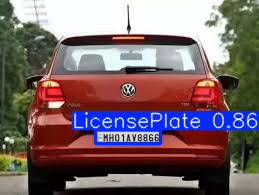

In [1]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from ultralytics import YOLO

# Load the YOLO model with the trained weights
model = YOLO('/content/License_plate_detection/runs/detect/train2/weights/best.pt')

# Load an image to perform inference on
image_path = '/content/License_plate_detection/demo2.jpeg'
image = cv2.imread(image_path)

# Run the YOLO model on the image
results = model.predict(source=image, save=False, show=False)  # Perform prediction

# Process the results
for result in results:

    if hasattr(result, "plot"):

        annotated_image = result.plot()
    else:
        # Manual bounding box plotting
        annotated_image = image.copy()
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
        classes = result.boxes.cls.cpu().numpy()  # Class indices

        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            confidence = confidences[i]
            label = f"License Plate: {confidence:.2f}"
            # Draw the bounding box
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Put label text
            cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the annotated image
    cv2_imshow(annotated_image)  # Display in Colab

cv2.destroyAllWindows()


In [ ]:
# import cv2
# from ultralytics import YOLO

# # Load the YOLO model with trained weights
# model = YOLO('/content/License_plate_detection/runs/detect/train2/weights/best.pt')  # Path to your trained model

# # Open the webcam (replace `0` with the camera index if using multiple cameras)
# cap = cv2.VideoCapture(0)

# # Check if the webcam opened successfully
# if not cap.isOpened():
#     print("Error: Unable to access the webcam.")
#     exit()

# # Loop to process video frames
# while True:
#     # Capture a frame from the webcam
#     ret, frame = cap.read()
#     if not ret:
#         print("Error: Unable to read frame from webcam.")
#         break

#     # Run YOLO inference on the frame
#     results = model.predict(source=frame, save=False, show=False)

#     # Process each result and overlay detections
#     for result in results:
#         # Annotate the frame with bounding boxes
#         annotated_frame = frame.copy()
#         if hasattr(result, "plot"):
#             annotated_frame = result.plot()
#         else:
#             boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
#             confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
#             classes = result.boxes.cls.cpu().numpy()  # Class indices

#             for i, box in enumerate(boxes):
#                 x1, y1, x2, y2 = map(int, box)
#                 confidence = confidences[i]
#                 label = f"License Plate: {confidence:.2f}"
#                 # Draw the bounding box
#                 cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#                 # Add label text
#                 cv2.putText(annotated_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

#         # Display the annotated frame
#         cv2.imshow("License Plate Detection", annotated_frame)

#     # Break the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the webcam and close the display window
# cap.release()
# cv2.destroyAllWindows()


Error: Unable to access the webcam.
Error: Unable to read frame from webcam.


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:360: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(attempt_download(weight), map_location='

In [5]:
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('/content/License_plate_detection/runs/detect/train2/weights/best.pt')
# to export the model to .mlmodel formate
model.export(format='coreml')


Ultralytics 8.3.32 🚀 Python-3.10.12 torch-1.12.1+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/License_plate_detection/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirement ['coremltools>=7.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 205.1 MB/s eta 0:00:00
  Attempting uninstall: coremltools
    Found existing installation: coremltools 6.0
    Uninstalling coremltools-6.0:
      Successfully uninstalled coremltools-6.0

requirements: AutoUpdate success ✅ 6.0s, installed 1 package: ['coremltools>=7.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




CoreML: starting export with coremltools 8.0...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 66.06 passes/s]


CoreML: export success ✅ 18.3s, saved as '/content/License_plate_detection/runs/detect/train2/weights/best.mlpackage' (5.9 MB)

Export complete (19.1s)
Results saved to /content/License_plate_detection/runs/detect/train2/weights
Predict:         yolo predict task=detect model=/content/License_plate_detection/runs/detect/train2/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=detect model=/content/License_plate_detection/runs/detect/train2/weights/best.mlpackage imgsz=640 data=/content/License_plate_detection/License-Plate-Detector-2/data.yaml  
Visualize:       https://netron.app


'/content/License_plate_detection/runs/detect/train2/weights/best.mlpackage'